<p align="center">
    <img src="https://github.com/GeostatsGuy/GeostatsPy/blob/master/TCG_color_logo.png?raw=true" width="220" height="240" />

</p>

## Data Analytics 

### Q-Q (Quantile-Quantile) and P-P (Probability-Probablity) Plots in Python 

#### Michael Pyrcz, Associate Professor, University of Texas at Austin 

##### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)


### Data Analytics: QQ Plots

Here's a demonstration of calculation of QQ-plots in Python. This demonstration is part of the resources that I include for my courses in Spatial / Subsurface Data Analytics and Geostatistics at the Cockrell School of Engineering and Jackson School of Goesciences at the University of Texas at Austin.  

We will cover the following statistics:

#### QQ-Plot
* Convenient plot to compare distributions

I have a lecture on QQ-plots available on [YouTube](https://www.youtube.com/watch?v=RETZus4XBNM).   

#### Getting Started

Here's the steps to get setup in Python with the GeostatsPy package:

1. Install Anaconda 3 on your machine (https://www.anaconda.com/download/). 
2. From Anaconda Navigator (within Anaconda3 group), go to the environment tab, click on base (root) green arrow and open a terminal. 
3. In the terminal type: pip install geostatspy. 
4. Open Jupyter and in the top block get started by copy and pasting the code block below from this Jupyter Notebook to start using the geostatspy functionality. 

You will need to copy the data file to your working directory.  The dataset is available on my GitHub account in my GeoDataSets repository at:

* Tabular data - [2D_MV_200wells.csv](https://github.com/GeostatsGuy/GeoDataSets/blob/master/2D_MV_200wells.csv)

#### Importing Packages

We will need some standard packages. These should have been installed with Anaconda 3.

In [1]:
import numpy as np                        # ndarrays for gridded data
import pandas as pd                       # DataFrames for tabular data
from scipy import stats                   # inverse percentiles, percentileofscore function for P-P plots
import os                                 # set working directory, run executables
import matplotlib.pyplot as plt           # plotting
import matplotlib.gridspec as gridspec
plt.rc('axes', axisbelow=True)

#### Set the Working Directory

I always like to do this so I don't lose files and to simplify subsequent read and writes (avoid including the full address each time). Set this to your working directory, with the above mentioned data file.

In [2]:
#os.chdir("d:/PGE383")                     # set the working directory

#### Make Data 

Let's specify two univariate Gaussian distribution and then sample from this distribution.

* This allows us to vary the distributions and number of data and visualize the impact on the QQ-plot.

In [3]:
n1 = 100; mean1 = 0.35; stdev1 = 0.06 
n2 = 50; mean2 = 0.3; stdev2 = 0.05

X1 = np.random.normal(loc=mean1,scale=stdev1,size=n1)
X2 = np.random.normal(loc=mean2,scale=stdev2,size=n2)

print()

nq = 100
xmin=0.0; xmax=0.6

#### Calculate the QQ-plot

Calculate and match percentiles from both data distributions.

In [4]:
cumul_prob = np.linspace(1,99,nq)
X1_percentiles = np.percentile(X1,cumul_prob)
X2_percentiles = np.percentile(X2,cumul_prob)

#### Make the Q-Q Plot Visualization

Let's look at the data histograms, cumulative distribution functions and QQ-plot.

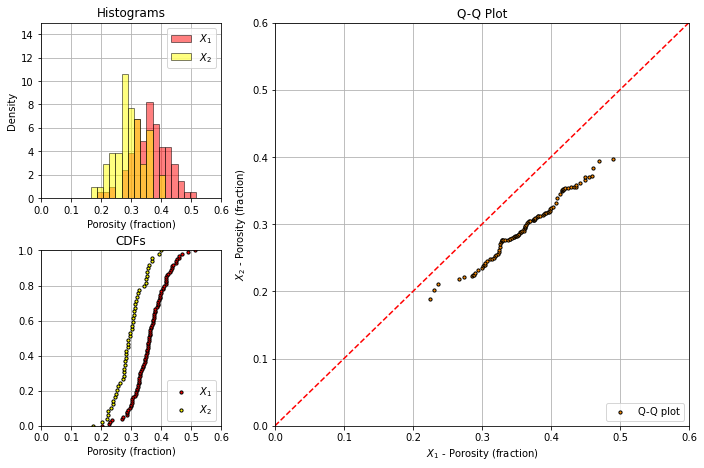

In [5]:
fig = plt.figure()
spec = fig.add_gridspec(2, 3)

ax0 = fig.add_subplot(spec[:, 1:])
plt.scatter(X1_percentiles,X2_percentiles,color='darkorange',edgecolor='black',s=10,label='Q-Q plot')
plt.plot([0,1],[0,1],ls='--',color='red')
plt.grid(); plt.xlim([xmin,xmax]); plt.ylim([xmin,xmax]); plt.xlabel(r'$X_1$ - Porosity (fraction)'); plt.ylabel(r'$X_2$ - Porosity (fraction)'); 
plt.title('Q-Q Plot'); plt.legend(loc='lower right')

ax10 = fig.add_subplot(spec[0, 0])
plt.hist(X1,bins=np.linspace(xmin,xmax,30),color='red',alpha=0.5,edgecolor='black',label=r'$X_1$',density=True)
plt.hist(X2,bins=np.linspace(xmin,xmax,30),color='yellow',alpha=0.5,edgecolor='black',label=r'$X_2$',density=True)
plt.grid(); plt.xlim([xmin,xmax]); plt.ylim([0,15]); plt.xlabel('Porosity (fraction)'); plt.ylabel('Density')
plt.title('Histograms'); plt.legend(loc='upper right')

ax11 = fig.add_subplot(spec[1, 0])
plt.scatter(np.sort(X1),np.linspace(0,1,len(X1)),color='red',edgecolor='black',s=10,label=r'$X_1$')
plt.scatter(np.sort(X2),np.linspace(0,1,len(X2)),color='yellow',edgecolor='black',s=10,label=r'$X_2$')
plt.grid(); plt.xlim([xmin,xmax]); plt.ylim([0,1]); plt.xlabel('Porosity (fraction)'); plt.title('CDFs'); plt.legend(loc='lower right')

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.5, top=1.4, wspace=0.3, hspace=0.3); plt.show()

#### Calculate the P-P plot

Calculate and match the values from both data distributions and plot the cumulative probilities.

In [6]:
min_X = min(X1.min(),X2.min())
max_X = max(X1.max(),X2.max())

X_values = np.linspace(min_X,max_X,nq)

X1_cumul_probs = []; X2_cumul_probs = []

for X in X_values:
    X1_cumul_probs.append(stats.percentileofscore(X1,X)/100)
    X2_cumul_probs.append(stats.percentileofscore(X2,X)/100)
    
X1_cumul_probs = np.asarray(X1_cumul_probs); X2_cumul_probs = np.asarray(X2_cumul_probs)

#### Make the P-P Plot Visualization

Let's look at the data histograms, cumulative distribution functions and QQ-plot.

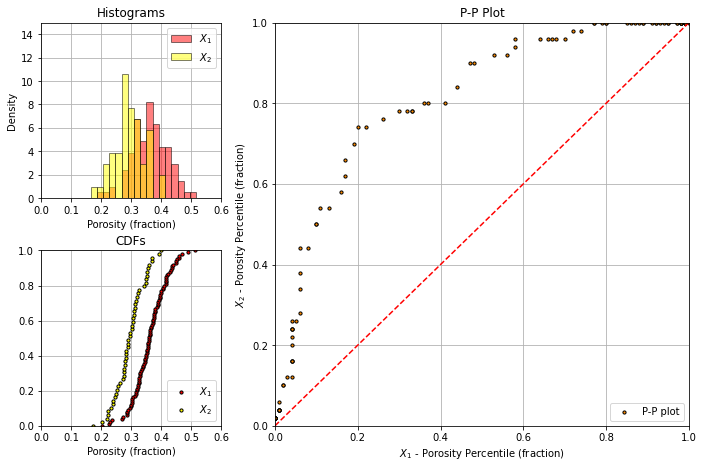

In [7]:
fig = plt.figure()
spec = fig.add_gridspec(2, 3)

ax0 = fig.add_subplot(spec[:, 1:])
plt.scatter(X1_cumul_probs,X2_cumul_probs,color='darkorange',edgecolor='black',s=10,label='P-P plot')
plt.plot([0,1.0],[0,1.0],ls='--',color='red')
plt.grid(); plt.xlim([0.0,1.0]); plt.ylim([0.0,1.0]); plt.xlabel(r'$X_1$ - Porosity Percentile (fraction)'); plt.ylabel(r'$X_2$ - Porosity Percentile (fraction)'); 
plt.title('P-P Plot'); plt.legend(loc='lower right')

ax10 = fig.add_subplot(spec[0, 0])
plt.hist(X1,bins=np.linspace(xmin,xmax,30),color='red',alpha=0.5,edgecolor='black',label=r'$X_1$',density=True)
plt.hist(X2,bins=np.linspace(xmin,xmax,30),color='yellow',alpha=0.5,edgecolor='black',label=r'$X_2$',density=True)
plt.grid(); plt.xlim([xmin,xmax]); plt.ylim([0,15]); plt.xlabel('Porosity (fraction)'); plt.ylabel('Density')
plt.title('Histograms'); plt.legend(loc='upper right')

ax11 = fig.add_subplot(spec[1, 0])
plt.scatter(np.sort(X1),np.linspace(0,1,len(X1)),color='red',edgecolor='black',s=10,label=r'$X_1$')
plt.scatter(np.sort(X2),np.linspace(0,1,len(X2)),color='yellow',edgecolor='black',s=10,label=r'$X_2$')
plt.grid(); plt.xlim([xmin,xmax]); plt.ylim([0,1]); plt.xlabel('Porosity (fraction)'); plt.title('CDFs'); plt.legend(loc='lower right')

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.5, top=1.4, wspace=0.3, hspace=0.3); plt.show()

#### Comments

This was a basic demonstration of QQ-plot and PP-plot in Python.

I have other demonstrations on the basics of working with DataFrames, ndarrays, univariate statistics, plotting data, declustering, data transformations, trend modeling and many other workflows available at [Python Demos](https://github.com/GeostatsGuy/PythonNumericalDemos) and a Python package for data analytics and geostatistics at [GeostatsPy](https://github.com/GeostatsGuy/GeostatsPy). 
  
I hope this was helpful,

*Michael*

#### The Author:

### Michael Pyrcz, Associate Professor, University of Texas at Austin 
*Novel Data Analytics, Geostatistics and Machine Learning Subsurface Solutions*

With over 17 years of experience in subsurface consulting, research and development, Michael has returned to academia driven by his passion for teaching and enthusiasm for enhancing engineers' and geoscientists' impact in subsurface resource development. 

For more about Michael check out these links:

#### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Want to Work Together?

I hope this content is helpful to those that want to learn more about subsurface modeling, data analytics and machine learning. Students and working professionals are welcome to participate.

* Want to invite me to visit your company for training, mentoring, project review, workflow design and / or consulting? I'd be happy to drop by and work with you! 

* Interested in partnering, supporting my graduate student research or my Subsurface Data Analytics and Machine Learning consortium (co-PIs including Profs. Foster, Torres-Verdin and van Oort)? My research combines data analytics, stochastic modeling and machine learning theory with practice to develop novel methods and workflows to add value. We are solving challenging subsurface problems!

* I can be reached at mpyrcz@austin.utexas.edu.

I'm always happy to discuss,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Associate Professor The Hildebrand Department of Petroleum and Geosystems Engineering, Bureau of Economic Geology, The Jackson School of Geosciences, The University of Texas at Austin

#### More Resources Available at: [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)
